In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

In [17]:
df = pd.read_csv("../data/scaled_data.csv")  # or your actual file


In [18]:
df.shape

(899, 12)

In [19]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,-1.428154,0.515943,-1.339390,0.465900,0.849636,-0.550362,-0.745031,1.384320,-0.822945,-0.855469,-1.034812,0
1,-0.475855,-1.938199,-0.265249,1.634714,-0.168122,-0.550362,-0.745031,0.752973,-0.822945,0.137516,0.623470,1
2,-1.745588,0.515943,-1.339390,-0.118507,0.793612,-0.550362,0.499918,-1.535661,-0.822945,-0.855469,-1.034812,0
3,-0.581666,-1.938199,0.808891,0.349019,0.149344,-0.550362,-0.745031,-1.141069,1.215148,0.634008,0.623470,1
4,0.053200,0.515943,-0.265249,1.050307,-0.028064,-0.550362,-0.745031,-0.588640,-0.822945,-0.855469,-1.034812,0


In [20]:
X = df.drop('target', axis=1)
y = df['target']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [22]:
def train_and_evaluate_models(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(),
        "KNN": KNeighborsClassifier()
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        results.append({
            "Model": name,
            "Accuracy": acc
        })

        print(f"=== {name} ===")
        print("Accuracy:", acc)
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print()

    return pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)


In [23]:
df = pd.read_csv("../data/scaled_data.csv")
results_df = train_and_evaluate_models(df, target_column="target")
print(results_df)


=== Logistic Regression ===
Accuracy: 0.8611111111111112
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        81
           1       0.87      0.88      0.87        99

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180

Confusion Matrix:
 [[68 13]
 [12 87]]

=== Random Forest ===
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        81
           1       0.90      0.92      0.91        99

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180

Confusion Matrix:
 [[71 10]
 [ 8 91]]

=== SVM ===
Accuracy: 0.8777777777777778
Classification Report:
               precision    recall  f1-score   support

       

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_model_accuracies(results_df):
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Accuracy')
    plt.ylabel('Model')
    plt.xlim(0.8, 1.0)
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


=== Logistic Regression ===
Accuracy: 0.8611111111111112
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        81
           1       0.87      0.88      0.87        99

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180

Confusion Matrix:
 [[68 13]
 [12 87]]

=== Random Forest ===
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89        81
           1       0.89      0.93      0.91        99

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180

Confusion Matrix:
 [[70 11]
 [ 7 92]]

=== SVM ===
Accuracy: 0.8777777777777778
Classification Report:
               precision    recall  f1-score   support

       

C:\Users\jaint\AppData\Local\Temp\ipykernel_31064\3135041937.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


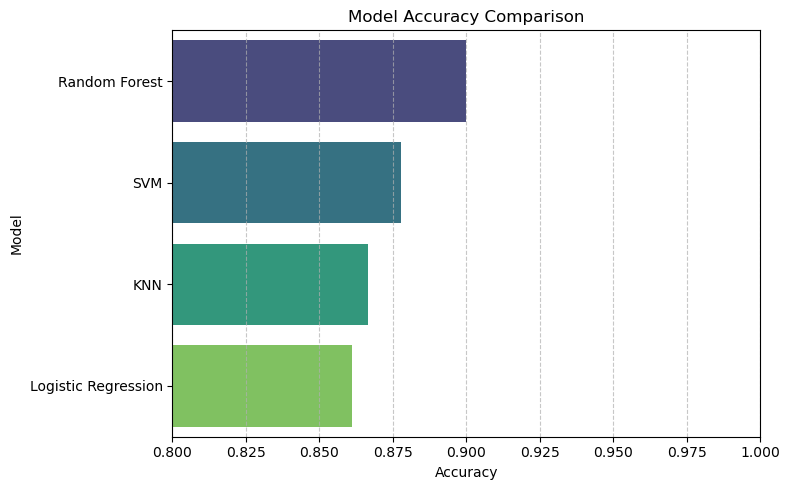

In [27]:
results_df = train_and_evaluate_models(df, target_column='target')  # use your actual target column
plot_model_accuracies(results_df)


In [32]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train the best model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(best_model, '../model/random_forest_model.pkl')


['../model/random_forest_model.pkl']